## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
#mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

**DATASET**



Since 2008, guests and hosts have been using Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

In [ ]:
#import dataset
data=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone projects/Airbnb/Airbnb NYC 2019.csv')

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#shape of the dataset
print(f'The shape of dataset is {data.shape}')

The shape of dataset is (48895, 16)


In [ ]:
#basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

There are 16 features that provide variety of information about bookings. It shows some missing values, which will require cleaning and handling of NaN values.

In [ ]:
#finding out columns that have null values
#using 'sum' function to show # nulls found in each column
missing_data= data.isnull().sum()


In [ ]:
missing_data

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Observation:

There are 16, 21, 10052, 10052 missing values of features name, host_name, last_review, reviews_per_month respectively.

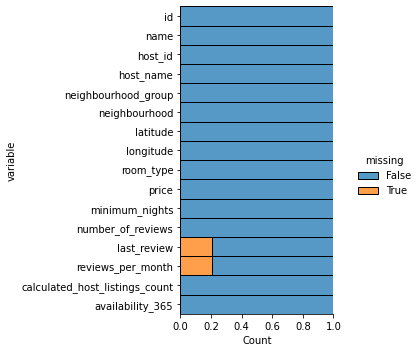

In [ ]:
sns.displot(data=data.isna().melt(value_name='missing'), y='variable', hue='missing', multiple='fill',aspect=1)


In [ ]:
#calculating the percentage of missing values
total_rows = np.product(data.shape)
total_missing =  missing_data.sum()
percentage_missing = np.round((total_missing / total_rows) * 100, 2)
print("Percentage of missing values in the dataset:", percentage_missing)

Percentage of missing values in the dataset: 2.57


Observation:

As seen in displot, there is around 2% of data missing, specifically 2.57% altogether from columns namely **last_review, reviews_per_month, name, host_name**. 

HANDLING MISSING VALUES IN DATASET





Missing values of categorical columns can be filled with dummy variable.

In [ ]:
#Missing values of columns "name" and "host_name" are filled with dummy variable - "Unknown".
data['name'].fillna(value = 'Unknown', axis = 'index', inplace = True)
data['host_name'].fillna(value = 'Unknown', axis = 'index', inplace = True)

Missing values of numerical columns are imputed with suitable numbers.

In our case, column "review_per_month" missing values can be imputed with 0.0 for missing values since "number_of_review" of corresponding column has a 0.


In [ ]:
data.fillna({'reviews_per_month':0}, inplace=True)

Irrelevant columns with missing values are dropped. 

In [ ]:
#Column "last_review" is of type date; For rows with no reviews of the listing - date doesn't exist. Hence considering this column as irrelevant, It's dropped.
data.drop(['last_review'], axis=1, inplace=True)


In [ ]:
#Cross-check the Null Values
data.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
#Descriptive statistics for numerical values
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Observation:

* For the feature "price", the mean value is 152.7 whereas minimum and maximum are 0 USD and 10000 USD resp.
Where 0 price seems illogical and extremely high priced listings cause skewness in its distribution. 
* Avg number of minimum nights stayed by travellers is 7.
* Avg number of days the listingings are available is 112.


In [ ]:
print("Skewness of price: %f" % data['price'].skew())
print("Kurtosis of price: %f" % data['price'].kurt())

Skewness of price: 19.118939
Kurtosis of price: 585.672879


Observation:

The skewness and kurtosis of price are quite high. It is positively skewed.
where,
Acceptable values of skewness: -3 to +3 
Acceptable values of kurtosis: -10 to 10 


#  Skewness measure of the features

In [ ]:
#excluding the features with lower significance 
c= set(data.columns)-{'latitude','longitude','id','host_id'}
c_list= data[c].describe().columns.to_list()

In [ ]:
data[c].describe()

,price,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews,minimum_nights
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,1.090910,7.143982,112.781327,23.274466,7.029962
std,240.154170,1.597283,32.952519,131.622289,44.550582,20.510550
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,69.000000,0.040000,1.000000,0.000000,1.000000,1.000000
50%,106.000000,0.370000,1.000000,45.000000,5.000000,3.000000
75%,175.000000,1.580000,2.000000,227.000000,24.000000,5.000000
max,10000.000000,58.500000,327.000000,365.000000,629.000000,1250.000000


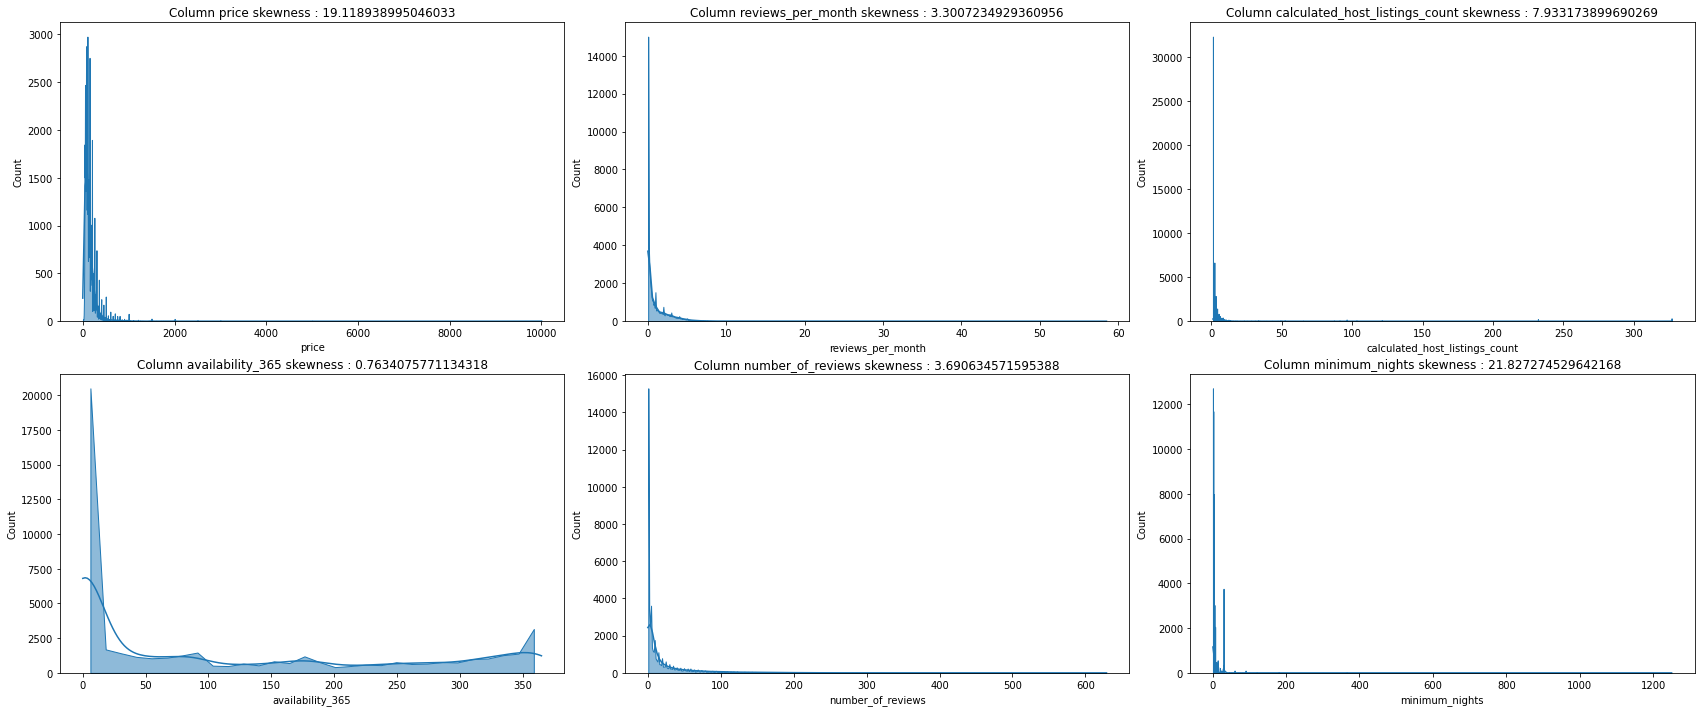

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
axes = axes.flatten()
for col, ax in zip(c_list, axes):
    sns.histplot(x=col, data=data, ax=ax, kde=True, element='poly')
    ax.set_title(f'Column {col} skewness : {data[col].skew()}')
 
plt.tight_layout(h_pad=0.5, w_pad=0.8)


Observation:

* From the above graphs, it can be concluded that, all the features namely "price", "calculated_host_listings_count", "reviews_per_month", "number_of_reviews", "minimum_nights", "availability_365"  have **positively skewed distribution.**
* Most of the listings have price <= 500 USD




---



# Finding Correlation among features of dataset:

In [ ]:
co_relation = data[c].corr()
#correlation among valid numerical features 

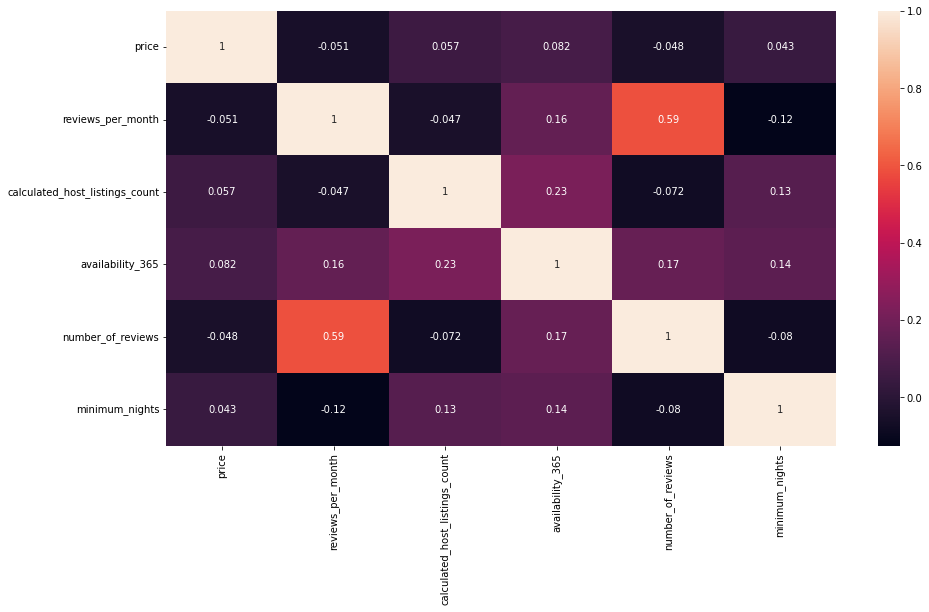

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(co_relation, annot=True)

Observation:
* Highly correlated features are "number_of_reviews" and "reviews_per_month". 
* No significant correlation between any other features of the dataset.



---



DISCOVERING KEY UNDERSTANDINGS


1. What can we learn about different hosts and areas?
2. What can we learn from predictions? (ex: locations, prices, reviews, etc)
3. Which hosts are the busiest and why?
4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?




# *1. What can we learn about different hosts and areas?*



---



---




HOSTS

1. Hosts with the most listings 

In [ ]:
data['host_name'].nunique()
#This shows the unique number of hosts. Hence using "host_id" feature to differentiate the rows uniquely.

11453

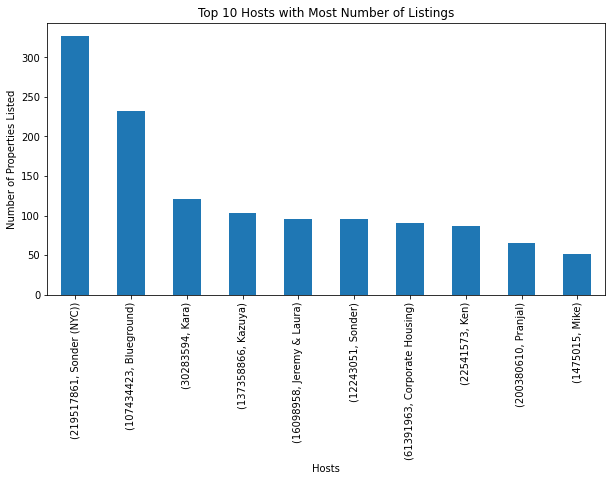

In [ ]:
#host having highest number of properties listed.
most_listings_host = data.groupby(['host_id', 'host_name'])['calculated_host_listings_count'].count().sort_values(ascending=False)[:10]
most_listings_host.plot.bar(figsize=(10,5))
plt.xlabel('Hosts')
plt.ylabel('Number of Properties Listed')
plt.title('Top 10 Hosts with Most Number of Listings');

Observation:

* Retrieving top 10 hosts with most properties listed.
* host **Sonder(NYC)** has the highest listings: 327 properties.




---



2. Hosts with the highest reviews 

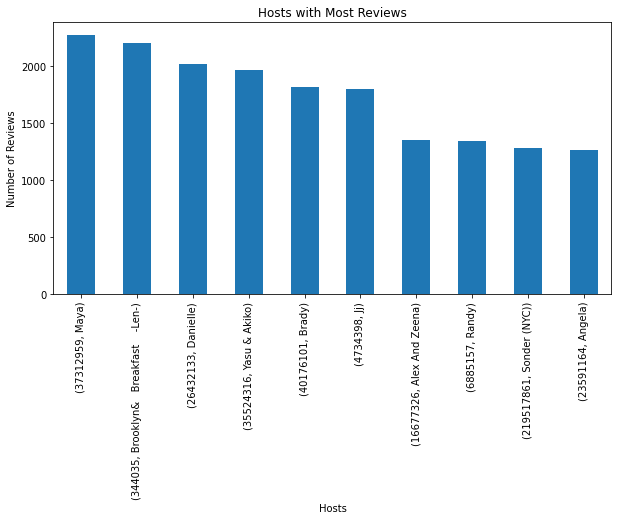

In [ ]:
#sort the dataset based on # reviews 
highest_reviews = data.groupby(['host_id', 'host_name'])["number_of_reviews"].sum().sort_values(ascending=False)[:10]
highest_reviews.plot.bar(figsize=(10,5))
plt.xlabel('Hosts')
plt.ylabel('Number of Reviews')
plt.title('Hosts with Most Reviews');


In [ ]:
highest_reviews.head(10)

host_id    host_name                     
37312959   Maya                              2273
344035     Brooklyn&   Breakfast    -Len-    2205
26432133   Danielle                          2017
35524316   Yasu & Akiko                      1971
40176101   Brady                             1818
4734398    Jj                                1798
16677326   Alex And Zeena                    1355
6885157    Randy                             1346
219517861  Sonder (NYC)                      1281
23591164   Angela                            1269
Name: number_of_reviews, dtype: int64

In [ ]:
d1=data[data["host_name"]=="Maya"]
d1[d1["host_id"]==37312959]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenue,total_revenue,average_revenue
9323,7125107,Room steps away from LaGuardia airport,37312959,Maya,Queens,East Elmhurst,40.77005,-73.87691,Private room,45,1,448,9.63,5,166,8955,42595,8519.0
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163,9292,42595,8519.0
13612,10186192,Only Steps away from LaGuardia arpt,37312959,Maya,Queens,East Elmhurst,40.77026,-73.87561,Private room,45,1,459,10.72,5,175,8550,42595,8519.0
14699,11618854,Walking distance to LaGuardia airport,37312959,Maya,Queens,East Elmhurst,40.77107,-73.87559,Private room,45,1,412,10.19,5,159,9270,42595,8519.0
18045,14133414,Space to rest near LaGuardia Airport,37312959,Maya,Queens,East Elmhurst,40.77009,-73.87708,Private room,32,1,411,11.40,5,161,6528,42595,8519.0


Observation:

* Host **Maya**, host id: **37312959**  has the most reviews for her properties i.e, 2273 reviews.
* It can be seen from the above data frame that reviews of Maya, 37312959 have the reviews summing up to 2273.
* It can be observed that the host with the most reviews isn't same as the host with most listings.
* Host **Sonder (NYC)**, host id: **219517861** having the most listings is one of the top 10 reviewed hosts as well.



---



3. Host with the highest earnings

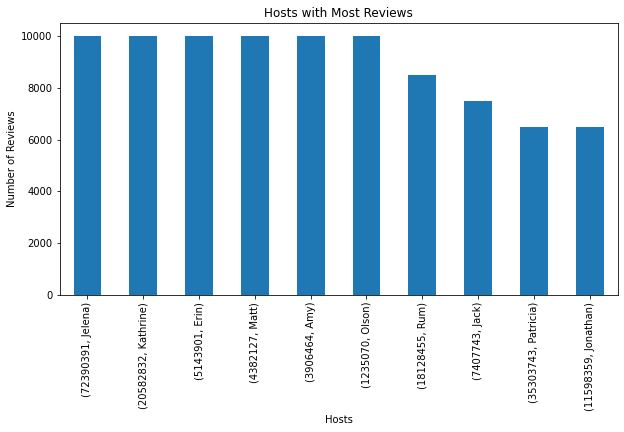

In [ ]:
#Top earning hosts
#Again unique hosts are obtained by grouping along with host_id. Since there are hosts with same names.
#calculating the mean price for listings of each host. Get the mean earning of each host and compare them to get the most earning ones.

highest_earnings = data.groupby(['host_id', 'host_name'])["price"].agg("mean").sort_values(ascending=False)[:10]
highest_earnings.plot.bar(figsize=(10,5))
plt.xlabel('Hosts')
plt.ylabel('Average Price')
plt.title('Hosts with Most Earnings')


In [ ]:
d1=data[data['host_name']=="Jenny"]
d1[d1["host_id"]==271248669]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenue,total_revenue,average_revenue
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,0.0,1,365,0,0,0.0


Observation:

* Most high-earning hosts earn about 10000 USD on average.




---



Neighbourhood Group

1. Number of listings in each neighbourhood group 

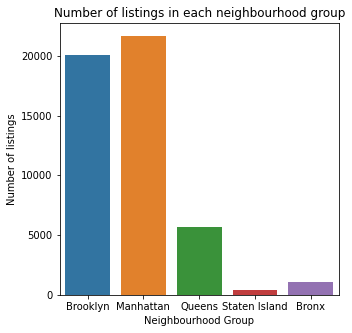

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data['neighbourhood_group'])
fig = plt.gcf()
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of listings')
ax.set_title('Number of listings in each neighbourhood group')
plt.show()

Observation:

* Manhattan has the highest listings compared to other neighbourhood groups. Staten Island has the lowest number of listings.



---



2. Area distribution of neighbourhood groups 

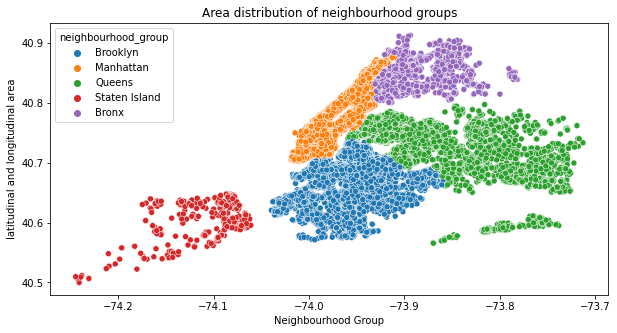

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('latitudinal and longitudinal area')
ax.set_title('Area distribution of neighbourhood groups')
plt.show()



---



# 2. What can we learn from predictions? (ex: locations, prices, reviews, etc)


---



---



1. Variation of price across neighbourhood groups for all room types.







In [ ]:
# Price comparison for each neighbourhood.
# Calculate median price for each neighbourhood group and all room types
room_based_price = data.groupby(['room_type','neighbourhood_group'], as_index=False)['price'].agg('median')
room_based_price.sort_values(by='price', ascending=False, inplace=True)
room_based_price.head()

,room_type,neighbourhood_group,price
2,Entire home/apt,Manhattan,191.0
1,Entire home/apt,Brooklyn,145.0
3,Entire home/apt,Queens,120.0
0,Entire home/apt,Bronx,100.0
4,Entire home/apt,Staten Island,100.0


Manhattan has the most expensive listings overall that can be illustrated using below lineplot

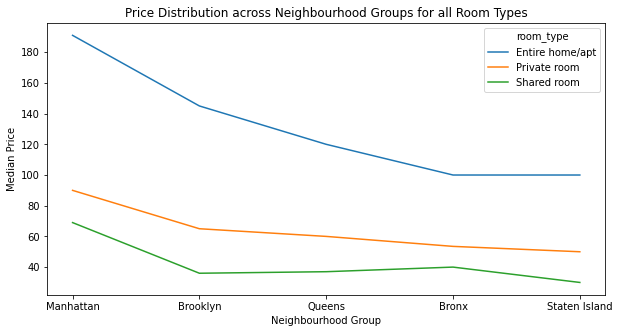

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.lineplot(data=room_based_price, x = 'neighbourhood_group', y = 'price',hue ='room_type')
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Median Price')
ax.set_title('Price Distribution across Neighbourhood Groups for all Room Types')
plt.show()

Conclusion: 
* Median is used to calculate the average for price instead of mean, due to the presence of outliers in price.
* Most private rooms are of medium and low price, hence being affordable and opted by many.
* Manhattan has the highest median price for all room types (Private, Apt, Shared).
* Entire home/apt room-type has the highest average price in all neighbourhood groups.
* Shared rooms are not preferred by many



---



2. Reviews across neighbourhood groups  

In [ ]:
#grouby neighbourhood groups and find number of reviews per group. Arranged in decreasing fashion of reviews
areas_reviews = data.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
areas_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


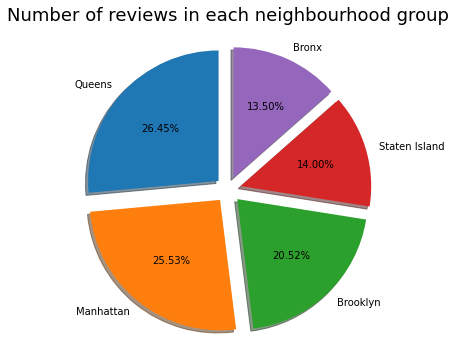

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews, labels = areas_reviews['neighbourhood_group'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )
plt.title('Number of Reviews in each Neighbourhood Group', {'fontsize': 18})
plt.show()

Observation:

* Queens and Manhattan are the most liked neighbourhood groups with the most reviews (assuming reviews to be positive only)



---



---



3. Describing the distribution of price among neighbourhoods




In [ ]:
# Average price of neighbourhoods arranged in decreasing fashion.
# consider only highly priced neighbourhoods 
neighbourhood_price = data.groupby(['neighbourhood','price'])["price"].agg("median").sort_values(ascending=False)[:100]


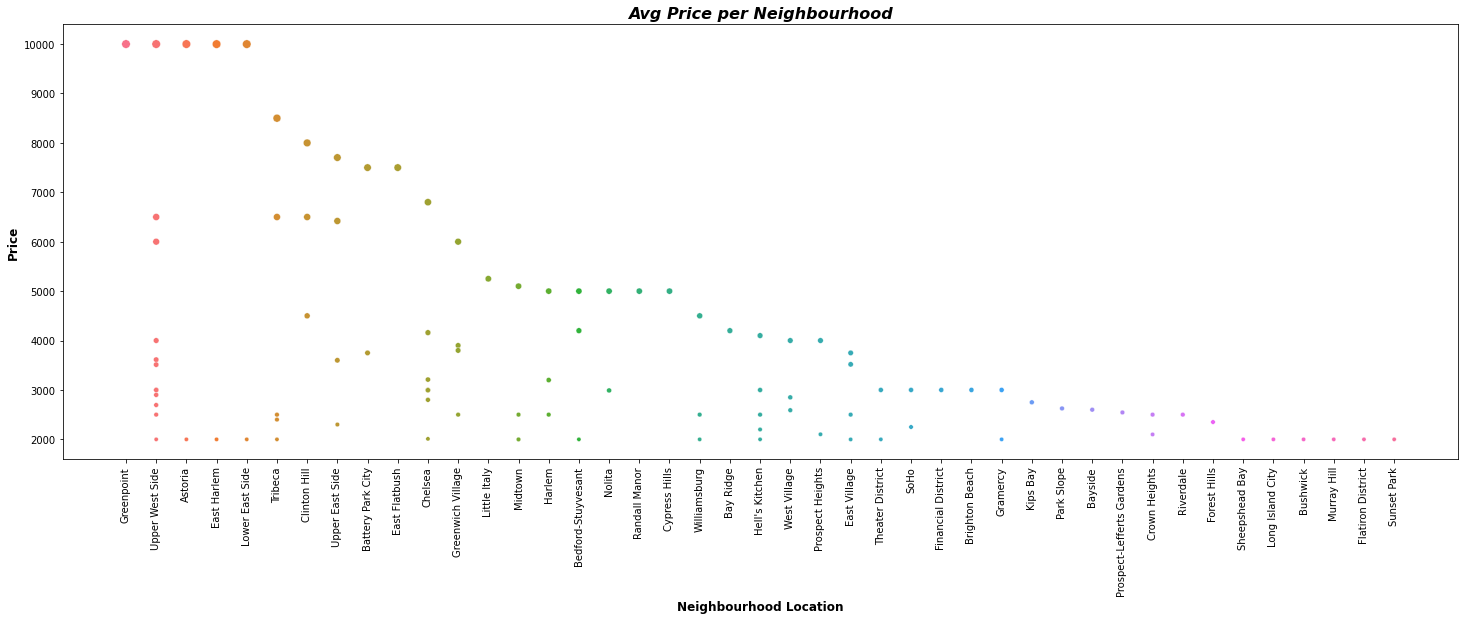

In [ ]:
plt.figure(figsize=(25,8))
sns.scatterplot(y = 'price', x = 'neighbourhood', hue = 'neighbourhood', size = 'price',data = neighbourhood_price,legend = False)
plt.xticks(rotation = 'vertical')
plt.title('Avg Price per Neighbourhood', fontsize = 16, fontweight = 'bold', fontstyle = 'italic')
plt.xlabel('Neighbourhood Location', fontsize = 12, fontweight = 'bold')
plt.ylabel('Price', fontsize = 12, fontweight = 'bold')
plt.show()

4. Describing the distribution of reviews with respect to neighbourhoods 

---



In [ ]:
#mean reviews of highly reviewed neighbourhoods 
neighbourhood_reviews = data.groupby(['neighbourhood','number_of_reviews'])["number_of_reviews"].agg("mean").sort_values(ascending=False)[:100]


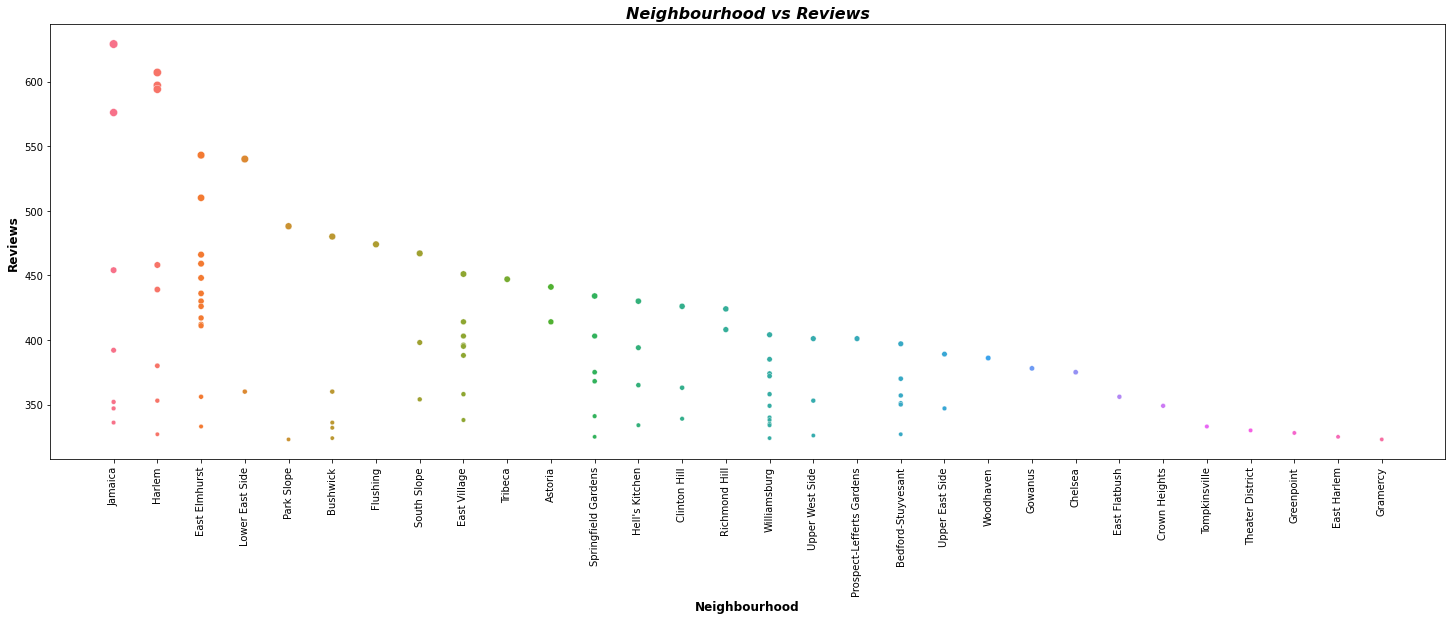

In [ ]:
plt.figure(figsize=(25,8))
sns.scatterplot(y = 'number_of_reviews', x = 'neighbourhood', hue = 'neighbourhood', size = 'number_of_reviews',data = neighbourhood_reviews,legend = False)
plt.xticks(rotation = 'vertical')
plt.title('Neighbourhood vs Reviews', fontsize = 16, fontweight = 'bold', fontstyle = 'italic')
plt.xlabel('Neighbourhood', fontsize = 12, fontweight = 'bold')
plt.ylabel('Reviews', fontsize = 12, fontweight = 'bold')
plt.show()

Observation:

* Thus most reviewed places can come from many factors such as affordability, more number of listings in the area, and economical importance.
* Most neighbourhoods with high reviews are of high average price. (Harlem, Bushwick, East Village, Williamsburg, Upper East Side, Upper West Side ) This implies most highly priced neighbourhoods are highly reviewed.



---



---



# 3. Which hosts are the busiest and why?

---





Neighbourhoods with most listings 

In [ ]:
areas_count = data['neighbourhood'].value_counts()[0:10]
areas_count

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

Text(0.5, 1.0, 'Top Neighbourhoods in Entire NYC on the basis of Count of Listings')

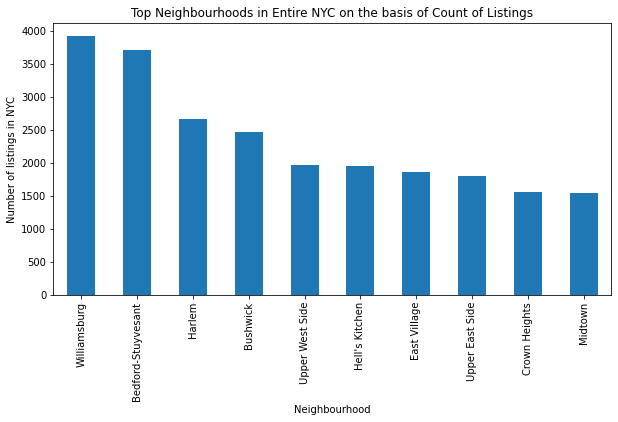

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
top_10_neigbourhoods= data['neighbourhood'].value_counts()[:10] 
#checking top 10 neighbourhoods on the basis of number of listings in entire NYC
top_10_neigbourhoods.plot.bar(figsize=(10,5))
plt.xlabel('Neighbourhood')
plt.ylabel('Number of listings in NYC')
plt.title('Top Neighbourhoods in Entire NYC on the basis of Count of Listings')

Observation:

* Williamsburg has the most listings 
* Almost all neighbourhoods with high listings are highly reviewed and highly priced.


Listings of each room types





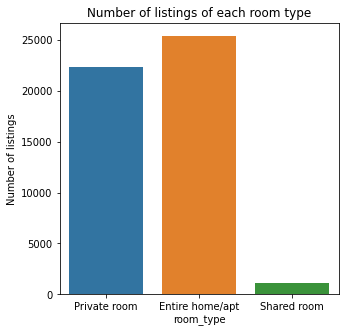

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data['room_type'])
fig = plt.gcf()
ax.set_xlabel('room_type')
ax.set_ylabel('Number of listings')
ax.set_title('Number of listings of each room type')
plt.show()

Observation:

Entire home/apt are the most preferred room_types, followed by private rooms. Shared rooms are least opted.

Busiest Host Analysis

In [ ]:
#Busiest hosts would be those who have maximum number of reviews, as most reviwed ones are booked frequently.
busiest_hosts = data.groupby(['host_name','host_id','neighbourhood_group','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,neighbourhood_group,room_type,number_of_reviews
10310,Dona,47621202,Queens,Private room,629
17755,Jj,4734398,Manhattan,Private room,607
25626,Maya,37312959,Queens,Private room,543
6259,Carol,2369681,Manhattan,Private room,540
8973,Danielle,26432133,Queens,Private room,510
3966,Asa,12949460,Brooklyn,Entire home/apt,488
37848,Wanda,792159,Brooklyn,Private room,480
22556,Linda,2680820,Queens,Private room,474
8651,Dani,42273,Brooklyn,Entire home/apt,467
2953,Angela,23591164,Queens,Private room,466


Observation:

The above mentioned hosts are the busiest due to following reasons:

* Neighbourhood groups Queens and Manhattan have the maximum number of reviews {**assuming the reviews to be positive**} as seen in [pie chart here](https://colab.research.google.com/drive/1J6CQlgfMOzsss4GIV1kQwrbQ-yqbxuMQ#scrollTo=yMvLRsBqTU8w&line=1&uniqifier=1https://). Hence most busiest hosts belong to these.
* Most listings are of type private room or entire home/apt. Again private rooms are often chosen due to their affordable prices. [see here](https://colab.research.google.com/drive/1J6CQlgfMOzsss4GIV1kQwrbQ-yqbxuMQ#scrollTo=QFos_za3k9U6&line=4&uniqifier=1)
* Dona from Jamaica, Queens is the busiest host according to the number of reviews. (**assuming the reviews to be positive**)






---



---



#4. Is there any noticeable difference of traffic among different areas and what could be the reason for it

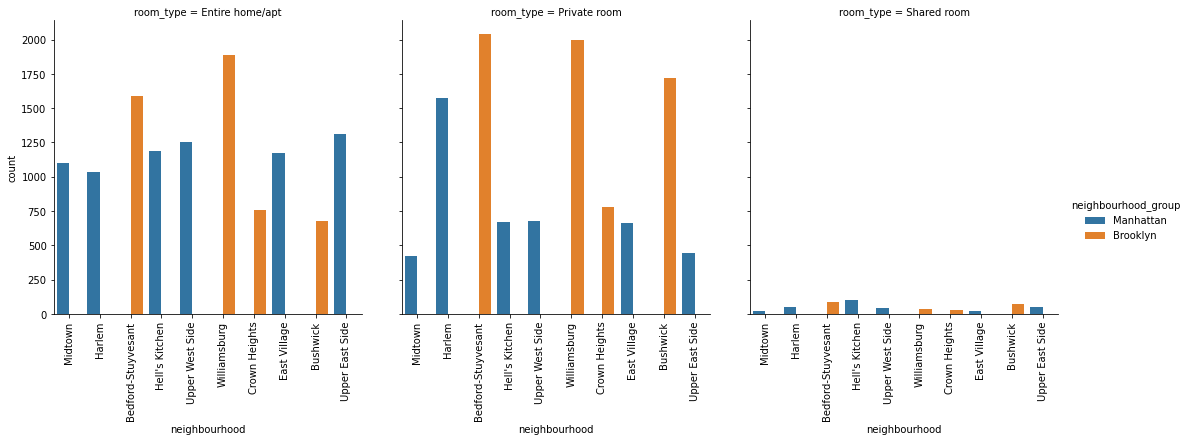

In [ ]:
#using catplot to represent number of listings in top 10 highly listed neighbourhoods of different room type.
sub=data.loc[data['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub, kind='count')
viz_3.set_xticklabels(rotation=90)

Observation: 

* For top 10 neighborhoods since Manhattan and Brooklyn are the busiest destinations, also with most listings. 
* Bedford-Stuyvesant and Williamsburg are the most popular(most listed) in Brooklyn, and Harlem in Manhattan.
* 'Shared room' type Airbnb listing is barely available among the 10 most listing-populated neighborhoods. 

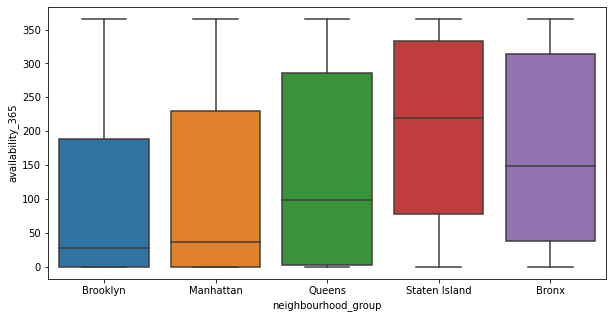

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365')

Observation:

* The mean availability of Brooklyn is the least. Hence listings in Brooklyn are seldom available and mostly booked. This implies there is high possibility of the group being prone to traffic. 

* Followed by Manhattan, Queens, Bronx and Staten Island.

In [ ]:

data.groupby(['neighbourhood','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index().sort_values(by='calculated_host_listings_count', ascending=False)[0:10]


,neighbourhood,neighbourhood_group,calculated_host_listings_count
214,Williamsburg,Brooklyn,3920
13,Bedford-Stuyvesant,Brooklyn,3714
94,Harlem,Manhattan,2658
28,Bushwick,Brooklyn,2465
202,Upper West Side,Manhattan,1971
95,Hell's Kitchen,Manhattan,1958
64,East Village,Manhattan,1853
201,Upper East Side,Manhattan,1798
51,Crown Heights,Brooklyn,1564
127,Midtown,Manhattan,1545


The most listed neighbourhoods belong to Brooklyn and Manhattan.

Analysis of noticeable traffic among different areas


*   Most neighbourhoods with high listings are present in Manhattan making it a busy place.
*   The private rooms are mostly of average price, which makes them affordable to a wide range of people and is highly reviewed too to make them prone to traffic.
*   The neighbourhoods with the most listings like- Bedford-Stuyvesant, Williamsburg in Brooklyn and Harlem in Manhattan, have the most number of private rooms explaining the traffic there. 
*   Though the shared rooms have least average price, due to lesser listings of this type and it’s least preference, the traffic cannot be expected.
*   Brooklyn and Manhattan having the least availability are expected to be prone to traffic.
*   Thus, number of listings, number of reviews, affordability etc contribute for traffic in certain areas.





---



---





---



# Calculation of Average Revenue.




In [ ]:
data1=data
data1['revenue'] = (365-data1['availability_365'])*data1['price']
data1['total_revenue'] = data1.groupby('host_id')['revenue'].transform(sum)
data1['average_revenue'] = data1['total_revenue']/data1['calculated_host_listings_count']

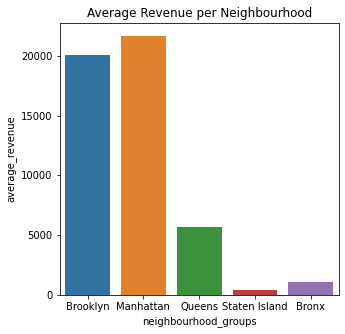

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data1['neighbourhood_group'])
fig = plt.gcf()
ax.set_xlabel('neighbourhood_groups')
ax.set_ylabel('average_revenue')
ax.set_title('Average Revenue per Neighbourhood')
plt.show()

Observation:

The average revenue of Manhattan is highest due to it's busy nature, presence of neighbourhoods with high listings and low average availability as seen in [boxplot](https://colab.research.google.com/drive/1J6CQlgfMOzsss4GIV1kQwrbQ-yqbxuMQ#scrollTo=U2rQ0TbkDO-D&line=1&uniqifier=1).



---



Distribution  of price among neighbourhood groups 

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

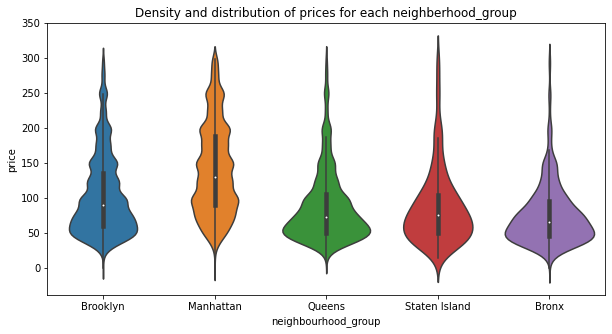

In [ ]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub=data[data.price < 300]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')


Observation:

* Brooklyn has an avg price of $80.

* Manhattan has highest range of price with an average around of $150.

* Queens and Staten Island have nearly the same median price. 

* Bronx, Staten Island and Queens have prices concentrated towards the median price.
* Staten Island has almost normal distribution of prices.




---



---



---



CONCLUSION

This Airbnb ('AB_NYC_2019') dataset allows us to perform data exploration on most of the columns.
Starting with the data preparation, data cleaning(handling missing values), descriptive analysis and correlation, we have moved on to answer the key understandings.

1. Talking about host with most listings, most reviews and most earnings include the analysis on feature-"host".
Next we have explored the neighbourhood groups with most listings and its geographical distribution. 

2. We explored various relations to learn from predictions.

*   Variation of average price across the neighbourhood groups for all room types.
*   Reviews per neighbourhood groups
*   Describing the distribution of price among neighbourhoods
*   Describing the distribution of reviews among neighbourhoods

3. Analysed the busiest host based on neighbourhoods with most listings, number of listings of each room type and most number of reviews.

4. Analysed and explained the reason for traffic in different areas using relation between number of reviews, neighbourhood group, room type, price and availability among different neighbourhood groups.

5. Calculated the average revenue per host and plotted it for different neighbourhood groups. 

6. Depicted the density of price distribution among neighbourhood groups using Violin plot.

The analysis would have been more specific/systematic if the reviews were broken down into positive and negative one or scaled according to emotion specified in it (like(0-5)). 
However throughout this analysis we have assumed reviews to be positive only.
And the analysis would definitely help in making better business decisions. 

Thank You.